# Getting started with Word2Vec in Gensim and making it work!

The idea behind Word2Vec is pretty simple. We are making and assumption that you can tell the meaning of a word by the company it keeps. This is analogous to the saying *show me your friends, and I'll tell who you are*. So if you have two words that have very similar neighbors (i.e. the usage context is about the same), then these words are probably quite similar in meaning or are at least highly related. For example, the words `shocked`,`appalled` and `astonished` are typically used in a similar context. 

In this tutorial, you will learn how to use the Gensim implementation of Word2Vec and actually get it to work! I have heard a lot of complaints about poor performance etc, but its really a combination of two things, (1) your input data and (2) your parameter settings. Note that the training algorithms in this package were ported from the [original Word2Vec implementation by Google](https://arxiv.org/pdf/1301.3781.pdf) and extended with additional functionality.

### Imports and logging

First, we start with our imports and get logging established:

In [7]:
# imports needed and set up logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


### Dataset 
Next, is our dataset. The secret to getting Word2Vec really working for you is to have lots and lots of text data. In this case I am going to use data from the [OpinRank](http://kavita-ganesan.com/entity-ranking-data/) dataset. This dataset has full user reviews of cars and hotels. I have specifically concatenated all of the hotel reviews into one big file which is about 97MB compressed and 229MB uncompressed. We will use the compressed file for this tutorial. Each line in this file represents a hotel review. You can download the OpinRank Word2Vec dataset here.

To avoid confusion, while gensim’s word2vec tutorial says that you need to pass it a sequence of sentences as its input, you can always pass it a whole review as a sentence (i.e. a much larger size of text), and it should not make much of a difference. 

Now, let's take a closer look at this data below by printing the first line. You can see that this is a pretty hefty review.

In [199]:
data_file="/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/test_W2.txt"
data_file2="/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*"

with open(data_file2, 'rb') as f:
    for i,line in enumerate (f):
        print(i)
        print(line)
        print(gensim.utils.simple_preprocess(line))


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*'

### Read files into a list
Now that we've had a sneak peak of our dataset, we can read it into a list so that we can pass this on to the Word2Vec model. Notice in the code below, that I am directly reading the 
compressed file. I'm also doing a mild pre-processing of the reviews using `gensim.utils.simple_preprocess (line)`. This does some basic pre-processing such as tokenization, lowercasing, etc and returns back a list of tokens (words). Documentation of this pre-processing method can be found on the official [Gensim documentation site](https://radimrehurek.com/gensim/utils.html). 



In [216]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    for file in glob.glob(input_file):
        with open(file, 'rb') as f:
            for i, line in enumerate (f): 
            #if (i%10000==0):
                #logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
                yield gensim.utils.simple_preprocess (line)
            yield ["GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF"]
            

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents2 = list (read_input(data_file2))

logging.info ("Done reading data file")    

2019-09-14 23:14:51,559 : INFO : reading file /mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*...this may take a while
2019-09-14 23:14:51,854 : INFO : Done reading data file


In [215]:
documents2

[['bml',
  'cpp',
  'defines',
  'the',
  'entry',
  'point',
  'for',
  'the',
  'console',
  'application'],
 [],
 [],
 ['include', 'stdafx'],
 ['include', 'iostream'],
 ['include', 'time'],
 ['include', 'windows'],
 ['include', 'math'],
 ['include', 'cstdlib'],
 ['using', 'namespace', 'std'],
 ['int', 'matrixsize'],
 ['bool', 'ischecked'],
 ['int', 'probability', 'procentach'],
 [],
 ['int', 'main'],
 [],
 ['bool', 'checkede', 'false'],
 ['bool', 'checkedn', 'false'],
 ['bool', 'tick', 'false'],
 ['generujemy', 'tablice'],
 ['int', 'matrix', 'new', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 [],
 ['matrix', 'new', 'int', 'matrixsize'],
 [],
 ['generujemy', 'tablice', 'pomocnicza'],
 ['int', 'matrix', 'new', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 [],
 ['matrix', 'new', 'int', 'matrixsize'],
 [],
 [],
 ['wypelniamy', 'glowna', 'tablice', 'zerami'],
 ['for', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 ['matrix'],
 [],
 [],
 ['wypelniamy', 'macierz', '

## Training the Word2Vec model

Training the model is fairly straightforward. You just instantiate Word2Vec and pass the reviews that we read in the previous step (the `documents`). So, we are essentially passing on a list of lists. Where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary. And by vocabulary, I mean a set of unique words.

After building the vocabulary, we just need to call `train(...)` to start training the Word2Vec model. Training on the [OpinRank](http://kavita-ganesan.com/entity-ranking-data/) dataset takes about 10 minutes so please be patient while running your code on this dataset.

Behind the scenes we are actually training a simple neural network with a single hidden layer. But, we are actually not going to use the neural network after training. Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn. 

In [20]:
model = gensim.models.Word2Vec (documents, size=150, window=5, min_count=1, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 16:43:52,916 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 16:43:52,917 : INFO : collecting all words and their counts
2019-09-14 16:43:52,917 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 16:43:52,925 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 16:43:52,935 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 16:43:52,944 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 16:43:52,953 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 16:43:52,961 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 16:43:52,969 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 16:43:52,977 : INFO : PROGRESS: at sentence

2019-09-14 16:43:53,538 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 16:43:53,547 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 16:43:53,555 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 16:43:53,563 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 16:43:53,571 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 16:43:53,579 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 16:43:53,586 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 16:43:53,587 : INFO : Loading a fresh vocabulary
2019-09-14 16:43:54,041 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 16:4

2019-09-14 16:44:07,721 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 16:44:07,732 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 16:44:07,732 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 16:44:07,733 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 16:44:07,735 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 16:44:07,736 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 16:44:07,739 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 16:44:07,739 : INFO : EPOCH - 1 : training on 2850148 raw words (2684230 effective words) took 1.9s, 1432699 effective words/s
2019-09-14 16:44:08,749 : INFO : EPOCH 2 - PROGRESS: at 53.21% examples, 1437820 words/s, in_qsize 19, out_qsize 0
2019-09-14 16:44:09,576 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 16:44:09

2019-09-14 16:44:20,449 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 16:44:20,452 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 16:44:20,452 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 16:44:20,453 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 16:44:20,454 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 16:44:20,454 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 16:44:20,454 : INFO : EPOCH - 8 : training on 2850148 raw words (2683517 effective words) took 1.8s, 1492972 effective words/s
2019-09-14 16:44:21,470 : INFO : EPOCH 9 - PROGRESS: at 53.39% examples, 1429448 words/s, in_qsize 20, out_qsize 0
2019-09-14 16:44:22,231 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 16:44:22,238 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 16:44:22

(26837602, 28501480)

In [33]:
model_350 = gensim.models.Word2Vec (documents, size=350, window=5, min_count=1, workers=10)
model_350.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 17:06:45,086 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 17:06:45,087 : INFO : collecting all words and their counts
2019-09-14 17:06:45,087 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 17:06:45,095 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 17:06:45,105 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 17:06:45,113 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 17:06:45,121 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 17:06:45,129 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 17:06:45,137 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 17:06:45,144 : INFO : PROGRESS: at sentence

2019-09-14 17:06:45,672 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 17:06:45,680 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 17:06:45,688 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 17:06:45,695 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 17:06:45,703 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 17:06:45,711 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 17:06:45,717 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 17:06:45,717 : INFO : Loading a fresh vocabulary
2019-09-14 17:06:46,199 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 17:0

2019-09-14 17:07:00,115 : WARNING : Effective 'alpha' higher than previous training cycles
2019-09-14 17:07:00,116 : INFO : training model with 10 workers on 215409 vocabulary and 350 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-09-14 17:07:01,128 : INFO : EPOCH 1 - PROGRESS: at 44.48% examples, 1194761 words/s, in_qsize 19, out_qsize 3
2019-09-14 17:07:02,132 : INFO : EPOCH 1 - PROGRESS: at 94.59% examples, 1267688 words/s, in_qsize 16, out_qsize 0
2019-09-14 17:07:02,188 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:07:02,191 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:07:02,196 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 17:07:02,205 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:07:02,206 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:07:02,207 : INFO : worker thread finished; awaiting finish

2019-09-14 17:07:15,118 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:07:15,130 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 17:07:15,134 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:07:15,136 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:07:15,138 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:07:15,139 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:07:15,140 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:07:15,142 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:07:15,145 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:07:15,145 : INFO : EPOCH - 7 : training on 2850148 raw words (2684033 effective words) took 2.1s, 1268827 effective words/s
2019-09-14 17:07:16,188 : INFO : EPOCH 8 - 

(26838281, 28501480)

## Now, let's look at some output 
This first example shows a simple case of looking up words similar to the word `dirty`. All we need to do here is to call the `most_similar` function and provide the word `dirty` as the positive example. This returns the top 10 similar words. 

In [34]:
model_250 = gensim.models.Word2Vec (documents, size=250, window=5, min_count=1, workers=10)
model_250.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 17:07:21,464 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 17:07:21,465 : INFO : collecting all words and their counts
2019-09-14 17:07:21,465 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 17:07:21,473 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 17:07:21,481 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 17:07:21,490 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 17:07:21,498 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 17:07:21,506 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 17:07:21,513 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 17:07:21,521 : INFO : PROGRESS: at sentence

2019-09-14 17:07:22,012 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 17:07:22,019 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 17:07:22,026 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 17:07:22,033 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 17:07:22,039 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 17:07:22,046 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 17:07:22,051 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 17:07:22,052 : INFO : Loading a fresh vocabulary
2019-09-14 17:07:22,557 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 17:0

2019-09-14 17:07:37,308 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:07:37,321 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:07:37,321 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 17:07:37,326 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:07:37,333 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:07:37,334 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:07:37,336 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:07:37,337 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:07:37,337 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:07:37,339 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:07:37,339 : INFO : EPOCH - 1 : training on 2850148 raw words (2684214 effect

2019-09-14 17:07:49,513 : INFO : EPOCH - 7 : training on 2850148 raw words (2683332 effective words) took 2.1s, 1303505 effective words/s
2019-09-14 17:07:50,544 : INFO : EPOCH 8 - PROGRESS: at 48.64% examples, 1292317 words/s, in_qsize 19, out_qsize 0
2019-09-14 17:07:51,509 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:07:51,523 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:07:51,524 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 17:07:51,528 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:07:51,534 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:07:51,536 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:07:51,537 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:07:51,538 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:07:51

(26836987, 28501480)

In [36]:
model_50 = gensim.models.Word2Vec (documents, size=50, window=5, min_count=1, workers=10)
model_50.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 17:08:25,408 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 17:08:25,408 : INFO : collecting all words and their counts
2019-09-14 17:08:25,409 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 17:08:25,416 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 17:08:25,424 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 17:08:25,432 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 17:08:25,440 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 17:08:25,447 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 17:08:25,454 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 17:08:25,461 : INFO : PROGRESS: at sentence

2019-09-14 17:08:25,952 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 17:08:25,959 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 17:08:25,966 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 17:08:25,972 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 17:08:25,979 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 17:08:25,986 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 17:08:25,991 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 17:08:25,992 : INFO : Loading a fresh vocabulary
2019-09-14 17:08:26,276 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 17:0

2019-09-14 17:08:38,532 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:08:38,535 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:08:38,537 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:08:38,538 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:08:38,539 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:08:38,542 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:08:38,546 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:08:38,547 : INFO : EPOCH - 1 : training on 2850148 raw words (2683704 effective words) took 1.7s, 1625955 effective words/s
2019-09-14 17:08:39,563 : INFO : EPOCH 2 - PROGRESS: at 58.86% examples, 1577070 words/s, in_qsize 19, out_qsize 0
2019-09-14 17:08:40,175 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:08:40

2019-09-14 17:08:50,073 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:08:50,076 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:08:50,077 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:08:50,079 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:08:50,080 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:08:50,082 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:08:50,082 : INFO : EPOCH - 8 : training on 2850148 raw words (2683918 effective words) took 1.7s, 1607250 effective words/s
2019-09-14 17:08:51,098 : INFO : EPOCH 9 - PROGRESS: at 58.37% examples, 1567759 words/s, in_qsize 19, out_qsize 0
2019-09-14 17:08:51,726 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:08:51,733 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:08:51

(26837635, 28501480)

In [332]:
w1 = "dirty"
model_w10.wv.most_similar(positive=w1)

[('summer', 0.598514199256897),
 ('shine', 0.5947161912918091),
 ('entertaining', 0.569084882736206),
 ('lovers', 0.5555052757263184),
 ('distraught', 0.549052357673645),
 ('lesbian', 0.5480132102966309),
 ('lunchbox', 0.5436629056930542),
 ('loves', 0.5386382937431335),
 ('macedonian', 0.5340943932533264),
 ('chilli', 0.533340573310852)]

In [32]:
model_350.wv.most_similar(positive=w1)

2019-09-14 17:06:17,359 : INFO : precomputing L2-norms of word weight vectors


[('lonely', 0.6224201321601868),
 ('yea', 0.5781300663948059),
 ('rin', 0.56827312707901),
 ('kubeq', 0.560832142829895),
 ('selkyle', 0.5602914094924927),
 ('ichi', 0.5590268969535828),
 ('kurai', 0.5576327443122864),
 ('haus', 0.5574352741241455),
 ('hada', 0.556331217288971),
 ('lovable', 0.5562098026275635)]

In [35]:
model_250.wv.most_similar(positive=w1)

2019-09-14 17:07:55,439 : INFO : precomputing L2-norms of word weight vectors


[('hilarious', 0.6041868925094604),
 ('bescheid', 0.6005462408065796),
 ('powdery', 0.5853187441825867),
 ('vart', 0.5842375755310059),
 ('sounding', 0.5832367539405823),
 ('impressive', 0.5798879861831665),
 ('loggat', 0.5757322907447815),
 ('bred', 0.5708400011062622),
 ('odor', 0.5691222548484802),
 ('acceptance', 0.5686191916465759)]

In [37]:
model_50.wv.most_similar(positive=w1)

2019-09-14 17:08:53,416 : INFO : precomputing L2-norms of word weight vectors


[('absolutely', 0.6712888479232788),
 ('rich', 0.6527135372161865),
 ('idk', 0.6500565409660339),
 ('sometimes', 0.6492269039154053),
 ('workclothes', 0.6474051475524902),
 ('tonight', 0.6447423696517944),
 ('fucking', 0.6414129734039307),
 ('gay', 0.6371513605117798),
 ('alright', 0.6371066570281982),
 ('lucian', 0.636875569820404)]

In [39]:
model_w30 = gensim.models.Word2Vec (documents, size=150, window=30, min_count=1, workers=10)
model_w30.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 17:17:31,410 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 17:17:31,411 : INFO : collecting all words and their counts
2019-09-14 17:17:31,411 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 17:17:31,418 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 17:17:31,426 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 17:17:31,434 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 17:17:31,442 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 17:17:31,450 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 17:17:31,457 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 17:17:31,464 : INFO : PROGRESS: at sentence

2019-09-14 17:17:31,959 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 17:17:31,966 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 17:17:31,973 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 17:17:31,980 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 17:17:31,990 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 17:17:31,998 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 17:17:32,004 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 17:17:32,005 : INFO : Loading a fresh vocabulary
2019-09-14 17:17:32,333 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 17:1

2019-09-14 17:17:46,067 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:17:46,070 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:17:46,073 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:17:46,077 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:17:46,079 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:17:46,081 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:17:46,089 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:17:46,089 : INFO : EPOCH - 1 : training on 2850148 raw words (2683513 effective words) took 1.8s, 1488969 effective words/s
2019-09-14 17:17:47,138 : INFO : EPOCH 2 - PROGRESS: at 54.73% examples, 1420330 words/s, in_qsize 19, out_qsize 0
2019-09-14 17:17:47,840 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:17:47

2019-09-14 17:17:58,764 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:17:58,768 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:17:58,768 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:17:58,776 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:17:58,780 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:17:58,786 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:17:58,786 : INFO : EPOCH - 8 : training on 2850148 raw words (2683910 effective words) took 1.7s, 1547741 effective words/s
2019-09-14 17:17:59,800 : INFO : EPOCH 9 - PROGRESS: at 55.33% examples, 1486673 words/s, in_qsize 20, out_qsize 0
2019-09-14 17:18:00,508 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:18:00,514 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:18:00

(26838329, 28501480)

In [45]:
model_w10 = gensim.models.Word2Vec (documents, size=150, window=10, min_count=1, workers=10)
model_w10.train(documents,total_examples=len(documents),epochs=10)

2019-09-14 17:22:40,361 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 17:22:40,362 : INFO : collecting all words and their counts
2019-09-14 17:22:40,362 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 17:22:40,369 : INFO : PROGRESS: at sentence #10000, processed 35336 words, keeping 7703 word types
2019-09-14 17:22:40,377 : INFO : PROGRESS: at sentence #20000, processed 81667 words, keeping 14883 word types
2019-09-14 17:22:40,385 : INFO : PROGRESS: at sentence #30000, processed 126818 words, keeping 20346 word types
2019-09-14 17:22:40,393 : INFO : PROGRESS: at sentence #40000, processed 166449 words, keeping 24392 word types
2019-09-14 17:22:40,400 : INFO : PROGRESS: at sentence #50000, processed 203483 words, keeping 28720 word types
2019-09-14 17:22:40,407 : INFO : PROGRESS: at sentence #60000, processed 238327 words, keeping 34046 word types
2019-09-14 17:22:40,414 : INFO : PROGRESS: at sentence

2019-09-14 17:22:40,897 : INFO : PROGRESS: at sentence #710000, processed 2642447 words, keeping 205688 word types
2019-09-14 17:22:40,905 : INFO : PROGRESS: at sentence #720000, processed 2679221 words, keeping 207750 word types
2019-09-14 17:22:40,912 : INFO : PROGRESS: at sentence #730000, processed 2713908 words, keeping 209261 word types
2019-09-14 17:22:40,919 : INFO : PROGRESS: at sentence #740000, processed 2746275 words, keeping 210737 word types
2019-09-14 17:22:40,926 : INFO : PROGRESS: at sentence #750000, processed 2777743 words, keeping 212385 word types
2019-09-14 17:22:40,934 : INFO : PROGRESS: at sentence #760000, processed 2813979 words, keeping 214510 word types
2019-09-14 17:22:40,940 : INFO : collected 215409 word types from a corpus of 2850148 raw words and 766508 sentences
2019-09-14 17:22:40,940 : INFO : Loading a fresh vocabulary
2019-09-14 17:22:41,564 : INFO : effective_min_count=1 retains 215409 unique words (100% of original 215409, drops 0)
2019-09-14 17:2

2019-09-14 17:22:54,754 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 17:22:54,758 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:22:54,763 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:22:54,764 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:22:54,765 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:22:54,766 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:22:54,768 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:22:54,768 : INFO : EPOCH - 1 : training on 2850148 raw words (2683523 effective words) took 1.7s, 1567300 effective words/s
2019-09-14 17:22:55,780 : INFO : EPOCH 2 - PROGRESS: at 55.62% examples, 1498518 words/s, in_qsize 19, out_qsize 0
2019-09-14 17:22:56,449 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:22:56

2019-09-14 17:23:06,770 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 17:23:06,771 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 17:23:06,774 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 17:23:06,775 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-14 17:23:06,775 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 17:23:06,782 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 17:23:06,782 : INFO : EPOCH - 8 : training on 2850148 raw words (2683476 effective words) took 1.7s, 1603832 effective words/s
2019-09-14 17:23:07,792 : INFO : EPOCH 9 - PROGRESS: at 57.81% examples, 1558263 words/s, in_qsize 18, out_qsize 0
2019-09-14 17:23:08,413 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 17:23:08,419 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 17:23:08

(26838145, 28501480)

In [40]:
model_w30.wv.most_similar(positive=w1)

2019-09-14 17:18:02,301 : INFO : precomputing L2-norms of word weight vectors


[('lubeless', 0.5587435364723206),
 ('retard', 0.5531840324401855),
 ('calm', 0.534084677696228),
 ('mason', 0.5227146148681641),
 ('feminine', 0.5135031938552856),
 ('mimic', 0.5090172290802002),
 ('scumbag', 0.5058559775352478),
 ('upstage', 0.5042057037353516),
 ('lame', 0.5012328028678894),
 ('set_preferences', 0.49891215562820435)]

In [46]:
model_w10.wv.most_similar(positive=w1)

2019-09-14 17:25:25,205 : INFO : precomputing L2-norms of word weight vectors


[('renderotica', 0.5119533538818359),
 ('add_file', 0.5112224221229553),
 ('workclothes', 0.4656129479408264),
 ('seriously', 0.46353253722190857),
 ('mason', 0.45548906922340393),
 ('tolerance', 0.4518297612667084),
 ('hada', 0.45053890347480774),
 ('jiong', 0.449445515871048),
 ('ichi', 0.4482629895210266),
 ('pulchritudinous', 0.4466547966003418)]

In [57]:
#print(model["dirty"])
print(model.similarity('this', 'is'))

0.18468846


/home/jupyter/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


That looks pretty good, right? Let's look at a few more. Let's look at similarity for `polite`, `france` and `shocked`. 

In [329]:
# look up top 6 words similar to 'polite'
w1 = ["dirty"]
model.wv.most_similar(positive=w1,topn=6)

[('wonder', 0.5567528009414673),
 ('summer', 0.5425893664360046),
 ('twilight', 0.5404902696609497),
 ('bunny', 0.5233567357063293),
 ('kid', 0.5134377479553223),
 ('teenager', 0.4938942790031433)]

In [25]:
model.wv.most_similar_cosmul(positive=w1,topn=6) #using the multiplicative combination objective

[('lonely', 0.8134220242500305),
 ('njemjeckij', 0.7894322872161865),
 ('scheint', 0.7692892551422119),
 ('dreglar', 0.7665601968765259),
 ('dałi', 0.7655606269836426),
 ('minskar', 0.7644549012184143)]

In [65]:
print (model.similarity('page', 'book'))
print (model.most_similar(positive=['machine'], topn=2))

0.3542429
[('automatically', 0.5599952936172485), ('slot', 0.5406605005264282)]


/home/jupyter/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/home/jupyter/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


That's, nice. You can even specify several positive examples to get things that are related in the provided context and provide negative examples to say what should not be considered as related. In the example below we are asking for all items that *relate to bed* only:

In [67]:
# get everything related to stuff on the bed
w1 = ['king']
w2 = ['man']
model.wv.most_similar(positive=w1,negative=w2,topn=10)


[('lyrical', 0.47744208574295044),
 ('linket', 0.4585130512714386),
 ('jayasindoor', 0.45342352986335754),
 ('rudramadevi', 0.44707661867141724),
 ('charlie', 0.4426744282245636),
 ('madanapalle', 0.43868982791900635),
 ('entertainments', 0.4371229112148285),
 ('internetes', 0.43119490146636963),
 ('textlabel', 0.4262203574180603),
 ('keaton', 0.4219883978366852)]

In [69]:
model.wv.doesnt_match(["marvel","miracle","wonder","prodigy"])

'prodigy'

In [155]:
import glob, os
import math

In [167]:
a=[1,2,3]
b=[3,4,5]



In [207]:
i=0
word_list=[]
for file in glob.glob("/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*"):
    with open(file, 'rb') as f: 
        for line in f: 
            word_list+=gensim.utils.simple_preprocess(line)
        word_list+=["GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF"]
    #i+=1
    #if i==1000: break
print(len(word_list))

158007


In [218]:
documents2

[['bml',
  'cpp',
  'defines',
  'the',
  'entry',
  'point',
  'for',
  'the',
  'console',
  'application'],
 [],
 [],
 ['include', 'stdafx'],
 ['include', 'iostream'],
 ['include', 'time'],
 ['include', 'windows'],
 ['include', 'math'],
 ['include', 'cstdlib'],
 ['using', 'namespace', 'std'],
 ['int', 'matrixsize'],
 ['bool', 'ischecked'],
 ['int', 'probability', 'procentach'],
 [],
 ['int', 'main'],
 [],
 ['bool', 'checkede', 'false'],
 ['bool', 'checkedn', 'false'],
 ['bool', 'tick', 'false'],
 ['generujemy', 'tablice'],
 ['int', 'matrix', 'new', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 [],
 ['matrix', 'new', 'int', 'matrixsize'],
 [],
 ['generujemy', 'tablice', 'pomocnicza'],
 ['int', 'matrix', 'new', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 [],
 ['matrix', 'new', 'int', 'matrixsize'],
 [],
 [],
 ['wypelniamy', 'glowna', 'tablice', 'zerami'],
 ['for', 'int', 'matrixsize'],
 ['for', 'int', 'matrixsize'],
 ['matrix'],
 [],
 [],
 ['wypelniamy', 'macierz', '

In [219]:
model_token = gensim.models.Word2Vec (documents2, size=150, window=5, min_count=1, workers=10)
model_token.train(documents2,total_examples=len(documents),epochs=10)

2019-09-14 23:15:52,043 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-14 23:15:52,044 : INFO : collecting all words and their counts
2019-09-14 23:15:52,044 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-14 23:15:52,050 : INFO : PROGRESS: at sentence #10000, processed 20534 words, keeping 9048 word types
2019-09-14 23:15:52,056 : INFO : PROGRESS: at sentence #20000, processed 49764 words, keeping 14651 word types
2019-09-14 23:15:52,063 : INFO : PROGRESS: at sentence #30000, processed 82068 words, keeping 18892 word types
2019-09-14 23:15:52,071 : INFO : PROGRESS: at sentence #40000, processed 120406 words, keeping 24004 word types
2019-09-14 23:15:52,078 : INFO : PROGRESS: at sentence #50000, processed 155347 words, keeping 28335 word types
2019-09-14 23:15:52,079 : INFO : collected 28746 word types from a corpus of 158007 raw words and 50536 sentences
2019-09-14 23:15:52,080 : INFO : Loading a fresh voca

2019-09-14 23:15:53,070 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-14 23:15:53,072 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 23:15:53,072 : INFO : EPOCH - 1 : training on 158007 raw words (148499 effective words) took 0.1s, 1585055 effective words/s
2019-09-14 23:15:53,072 : WARNING : EPOCH - 1 : supplied example count (50536) did not equal expected count (766508)
2019-09-14 23:15:53,158 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 23:15:53,166 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 23:15:53,167 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 23:15:53,168 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 23:15:53,168 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 23:15:53,169 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 23:15:53

2019-09-14 23:15:53,809 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-14 23:15:53,810 : INFO : EPOCH - 8 : training on 158007 raw words (148569 effective words) took 0.1s, 1521552 effective words/s
2019-09-14 23:15:53,810 : WARNING : EPOCH - 8 : supplied example count (50536) did not equal expected count (766508)
2019-09-14 23:15:53,897 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-09-14 23:15:53,900 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-09-14 23:15:53,901 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-09-14 23:15:53,901 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-09-14 23:15:53,902 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-09-14 23:15:53,902 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-09-14 23:15:53,906 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-14 23:15:53

(1485489, 1580070)

In [246]:
import numpy as np

In [323]:
def vectors_creator(file):
    with open(file, 'rb') as f:
        word_list=[]
        vec_list=[]
        average_vec=0
        #sum_list=np.zeros(150)
        count=0
        for line in f: 
            word_list+=gensim.utils.simple_preprocess(line)
        for i in word_list:
            count+=1
            vec_list.append(model_token.wv.get_vector(i)) #vector

        q1=sum(vec_list[:math.ceil(count/4)])
        q2=sum(vec_list[math.ceil(count/4):math.ceil(count/2)])
        q3=sum(vec_list[math.ceil(count/2):math.ceil(3*count/4)])
        q4=sum(vec_list[math.ceil(3*count/4):])
        q1_234=q1-(q2+q3+q4)
        q12_34=(q1+q2)-(q3+q4)
        q123_4=(q1+q2+q3)-q4
        sum_vec=sum(vec_list)
        
        if count!=0:
            average_vec=sum_vec/count #average
        else
        #return([average_vec,q1_234, q12_34,q123_4])
        return(np.concatenate((average_vec,q1_234, q12_34,q123_4), axis=None))
    
files_vectors=[]
for file in glob.glob("/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*"):
    files_vectors.append(vectors_creator(file))
    

    

In [284]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [335]:
a=[1,2,3]
a[(0,1)]


TypeError: list indices must be integers or slices, not tuple

In [326]:
#files_vectors[10]

600

[ 1.62531108e-01  1.90492898e-01 -3.15210015e-01 -9.79873538e-02
  3.73008405e-03 -1.71369627e-01  1.65466994e-01  2.57585585e-01
  3.13944161e-01  7.17104925e-03  1.81311816e-01 -6.44897670e-02
 -2.43299138e-02  3.82097423e-01  2.59005874e-01  3.99423718e-01
 -3.45725030e-01  1.49155617e-01 -7.36202672e-02  5.08686900e-01
  3.85111809e-01 -1.34545401e-01  5.79842627e-01 -2.14001402e-01
  2.47484252e-01 -1.51147619e-01  1.36945069e-01  7.02191472e-01
  1.67360991e-01  1.96563497e-01  1.72312871e-01 -3.26711476e-01
  2.84722894e-01  5.48251122e-02  7.18404710e-01 -3.77863079e-01
 -4.37244028e-01  9.20294896e-02 -2.53010154e-01 -1.66559041e-01
  6.63878210e-03  2.86822021e-01  3.61746252e-01 -2.88902164e-01
 -3.80281687e-01 -2.93510228e-01 -1.71230331e-01 -3.95874768e-01
 -1.99198663e-01  1.38881326e-01 -7.24303052e-02  3.49531561e-01
 -8.76116008e-02 -1.07873209e-01 -6.21276125e-02 -2.50727594e-01
 -3.82723659e-01  3.60297352e-01 -2.34846041e-01 -4.68731582e-01
  1.94531828e-01 -3.89202

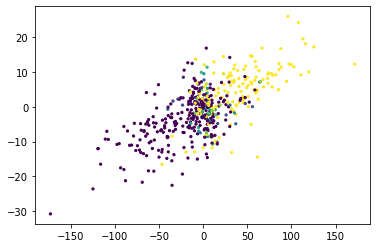

In [328]:
f0 = files_vectors[0]
print(f0)
f1 = files_vectors[1]
f2 = files_vectors[2]
f3 = files_vectors[3]
X = np.array(list(zip(f0, f1)))
#plt.scatter(f0, f1, c='black', s=7)
plt.scatter(f0, f1, c=f2, s=5,  vmin=1, vmax=5)
clusters = np.zeros(len(X))
if 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

In [222]:
#old
for file in glob.glob("/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/*"):
    print(file)
    with open(file, 'rb') as f:
        word_list=[]
        vec_list=[]
        average_list=[0,0,0,0,0,0]
        
        for line in f: 
            word_list+=gensim.utils.simple_preprocess(line)
        #word_list+=["GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF","GXO_EOF"]
        for i in word_list:
            vec_list.append(model.wv.get_vector(i)) #vector
            suma=sum(model.wv.get_vector(i))
            leng=len(model.wv.get_vector(i))
            #print(suma)
            #print(suma/leng)
            #print(sum(model.wv.get_vector(i)[:math.ceil(leng/4)])/(leng/4))
            #print(sum(model.wv.get_vector(i)[math.ceil(leng/4):math.ceil(leng/2)])/(leng/4))
            #print(sum(model.wv.get_vector(i)[math.ceil(leng/2):math.ceil(3*leng/4)])/(leng/4))
            #print(sum(model.wv.get_vector(i)[math.ceil(3*leng/4):])/(leng/4))
            #print(model.wv.get_vector(i))
            average_list = map(lambda x, y: x + y, average_list, ([suma,suma/leng, \
                                 sum(model.wv.get_vector(i)[:math.ceil(leng/4)])/(leng/4), \
                                 sum(model.wv.get_vector(i)[math.ceil(leng/4):math.ceil(leng/2)])/(leng/4), \
                                 sum(model.wv.get_vector(i)[math.ceil(leng/2):math.ceil(3*leng/4)])/(leng/4), \
                                 sum(model.wv.get_vector(i)[math.ceil(3*leng/4):])/(leng/4)]) )
            #print(list(result)) 
    break 
print(list(average_list))




/mnt/servx1vol/Bams/genXone/20190914_1350_hackyeah/hackyeah_data_80/5bf/5bf341e4e2c4e4e0a124e1798b1b3afdb4d9db00


KeyError: "word 'matrixsize' not in vocabulary"

### Similarity between two words in the vocabulary

You can even use the Word2Vec model to return the similarity between two words that are present in the vocabulary. 

In [57]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.76181122646029453

In [58]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0000000000000002

In [59]:
# similarity between two unrelated words
model.wv.similarity(w1="dirty",w2="clean")

0.25355593501920781

Under the hood, the above three snippets computes the cosine similarity between the two specified words using word vectors of each. From the scores, it makes sense that `dirty` is highly similar to `smelly` but `dirty` is dissimilar to `clean`. If you do a similarity between two identical words, the score will be 1.0 as the range of the cosine similarity score will always be between [0.0-1.0]. You can read more about cosine similarity scoring [here](https://en.wikipedia.org/wiki/Cosine_similarity).

### Find the odd one out
You can even use Word2Vec to find odd items given a list of items.

In [63]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [77]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])


'shower'

## Understanding some of the parameters
To train the model earlier, we had to set some parameters. Now, let's try to understand what some of them mean. For reference, this is the command that we used to train the model.

```
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
```

### `size`
The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. A value of 100-150 has worked well for me. 

### `window`
The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window. 

### `min_count`
Minimium frequency count of words. The model would ignore words that do not statisfy the `min_count`. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

### `workers`
How many threads to use behind the scenes?


## When should you use Word2Vec?

There are many application scenarios for Word2Vec. Imagine if you need to build a sentiment lexicon. Training a Word2Vec model on large amounts of user reviews helps you achieve that. You have a lexicon for not just sentiment, but for most words in the vocabulary. 

Beyond, raw unstructured text data, you could also use Word2Vec for more structured data. For example, if you had tags for a million stackoverflow questions and answers, you could find tags that are related to a given tag and recommend the related ones for exploration. You can do this by treating each set of co-occuring tags as a "sentence" and train a Word2Vec model on this data. Granted, you still need a large number of examples to make it work. 
